# Importing initial Library


In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm

# Data loading and intial cleaning , Ensuring imputation

In [2]:
seed = 7
num_trees= 100
max_features = 3
rng = RandomState(seed)
df = pd.read_csv('preprocessed_WN.csv')
df1=df
X1, y1 = df.iloc[:, :-1], df.iloc[:, -1]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df = imputer.fit_transform(df)
df=pd.DataFrame(df)
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(10527, 64) (10527,)


In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA Analysis

In [4]:
intervention=df.iloc[:,-1]
data_min = X.min(axis=0)
data_max = X.max(axis=0)
data_norm = (X-data_min)/(data_max-data_min)

In [5]:
pca = PCA(n_components=30)
pca.fit(data_norm)

PCA(n_components=30)

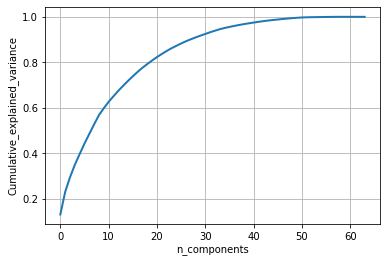

In [6]:
pca.n_components = 64
pca_data = pca.fit_transform(data_norm)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
cum_var_explained
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis()
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [7]:
pca = PCA(n_components=30)
pca.fit(data_norm)

PCA(n_components=30)

In [8]:
print(pca.components_)

[[ 2.54159111e-02 -9.21301623e-02  2.68975631e-01 ...  3.51462821e-02
   1.06712205e-05  1.05815006e-02]
 [-1.67159461e-01  4.91481316e-01  5.23475160e-02 ... -1.52628858e-01
   3.53893658e-05 -8.07159889e-03]
 [-3.19866194e-02 -3.45319160e-02  1.69781415e-01 ...  2.57995732e-02
  -1.61798821e-03  1.51187084e-02]
 ...
 [ 2.86548294e-02  1.28244653e-01 -9.61075132e-02 ... -1.54201223e-01
   1.69784331e-02 -3.79522834e-02]
 [-1.44890325e-02 -6.05339814e-02 -8.42258593e-02 ... -1.29213795e-01
   1.26657746e-02 -7.37884774e-02]
 [-1.65677225e-02 -1.45500290e-02  8.72985282e-02 ... -1.53756727e-01
  -1.84534976e-02 -9.65491821e-02]]


[0.73923865 0.5595374  0.36509289 0.30884163 0.26853652 0.26033792
 0.24016087 0.23947944 0.22719213 0.17131139 0.1578255  0.1389302
 0.13560553 0.12454295 0.12063742 0.11397328 0.11124552 0.10246142
 0.09124713 0.08985006 0.08295712 0.07734477 0.07388287 0.06824064
 0.05978137 0.05888967 0.05544165 0.04897847 0.04648111 0.04403535]
[0.13085388 0.09904466 0.06462571 0.05466858 0.0475341  0.04608285
 0.04251128 0.04239066 0.04021566 0.03032412 0.02793696 0.02459227
 0.02400376 0.02204556 0.02135423 0.0201746  0.01969176 0.01813687
 0.01615181 0.01590451 0.01468438 0.01369093 0.01307813 0.01207939
 0.010582   0.01042416 0.00981382 0.00866976 0.0082277  0.00779477]


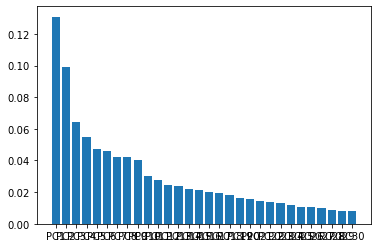

In [9]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
plt.bar(x=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","P20","PC21","PC22","PC23","PC24","PC25","PC26","PC27","PC28","PC29","PC30"],height=pca.explained_variance_ratio_)
plt.show()

In [10]:
weights = pca.components_
weights = weights.transpose()
T = data_norm.dot(weights[:,:2])

In [11]:
print(T)

              0         1
0     -0.894765  1.209479
1      0.674802  1.355948
2      0.577062  1.295693
3     -0.787683 -1.099659
4      1.083735 -0.651481
...         ...       ...
10522 -0.898022 -0.755663
10523  0.982966 -0.296966
10524  0.780797 -0.373084
10525  0.611716 -0.348556
10526  1.066219 -0.386088

[10527 rows x 2 columns]


In [12]:
print(pca.explained_variance_)

[0.73923865 0.5595374  0.36509289 0.30884163 0.26853652 0.26033792
 0.24016087 0.23947944 0.22719213 0.17131139 0.1578255  0.1389302
 0.13560553 0.12454295 0.12063742 0.11397328 0.11124552 0.10246142
 0.09124713 0.08985006 0.08295712 0.07734477 0.07388287 0.06824064
 0.05978137 0.05888967 0.05544165 0.04897847 0.04648111 0.04403535]


In [13]:
print(pca.explained_variance_ratio_)

[0.13085388 0.09904466 0.06462571 0.05466858 0.0475341  0.04608285
 0.04251128 0.04239066 0.04021566 0.03032412 0.02793696 0.02459227
 0.02400376 0.02204556 0.02135423 0.0201746  0.01969176 0.01813687
 0.01615181 0.01590451 0.01468438 0.01369093 0.01307813 0.01207939
 0.010582   0.01042416 0.00981382 0.00866976 0.0082277  0.00779477]


In [14]:
X=pca.transform(data_norm)

# Splitting The data

In [15]:

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (8421, 30) (8421,)
Test set:  (2106, 30) (2106,)


# Importing All model Building Library

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Defining the Model

In [17]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
sv = SVC(kernel='rbf', C=15.0)

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')

gnb = GaussianNB()

kfold = KFold(n_splits=10)
KNN = KNeighborsClassifier()

BC=BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=seed)

EC=ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

ADC=AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 

GBC=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)



BCR=BaggingClassifier(base_estimator=rf, n_estimators=num_trees, random_state=seed)

mnb=MultinomialNB()

# Fitting the Model

In [18]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x2011BE3EB40)

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x2011BE3EB40)

In [20]:
sv.fit(X_train, y_train)

SVC(C=15.0)

In [21]:
gnb.fit(X_train, y_train)

GaussianNB()

In [22]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
BC.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x2011BE3EB40),
                  n_estimators=100, random_state=7)

In [24]:
EC.fit(X_train, y_train)

ExtraTreesClassifier(max_features=3)

In [25]:
ADC.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=7)

In [26]:
GBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=7)

In [27]:
LR.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [28]:
BCR.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x2011BE3EB40),
                  n_estimators=100, random_state=7)

In [29]:
#dt.fit(X_train, y_train)
#rf.fit(X_train, y_train)
#sv.fit(X_train, y_train)
#gnb.fit(X_train, y_train)
#KNN.fit(X_train, y_train)
#BC.fit(X_train, y_train)
#EC.fit(X_train, y_train)
#ADC.fit(X_train, y_train)
#GBC.fit(X_train, y_train)
#LR.fit(X_train, y_train)
#BCR.fit(X_train, y_train)
#mnb.fit(X_train, y_train)

# Predicting the Value

In [30]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gnb_pred = gnb.predict(X_test)
KNN_pred = KNN.predict(X_test)
BC_pred = BC.predict(X_test)
EC_pred = EC.predict(X_test)
ADC_pred = ADC.predict(X_test)
GBC_pred = GBC.predict(X_test)
LR_pred = LR.predict(X_test)
BCR_pred = BCR.predict(X_test)


# Getting Accuracy and AUC

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
sv_acc = accuracy_score(y_test, sv_pred)
gnb_acc = accuracy_score(y_test, gnb_pred)
KNN_acc = accuracy_score(y_test, KNN_pred)
BC_acc = accuracy_score(y_test, BC_pred)
EC_acc = accuracy_score(y_test, EC_pred)
ADC_acc = accuracy_score(y_test, ADC_pred)
GBC_acc = accuracy_score(y_test, GBC_pred)
LR_acc = accuracy_score(y_test, LR_pred)
BCR_acc = accuracy_score(y_test, BCR_pred)


In [32]:
dt_auc = roc_auc_score(y_test, dt_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
sv_auc = roc_auc_score(y_test, sv_pred)
gnb_auc = roc_auc_score(y_test, gnb_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
BC_auc = roc_auc_score(y_test, BC_pred)
EC_auc = roc_auc_score(y_test, EC_pred)
ADC_auc = roc_auc_score(y_test, ADC_pred)
GBC_auc = roc_auc_score(y_test, GBC_pred)
LR_auc = roc_auc_score(y_test, LR_pred)
BCR_auc = roc_auc_score(y_test, BCR_pred)


In [33]:
print('Decision tree acc: %.6f' % dt_acc)
print('Random forest acc: %.6f' % rf_acc)
print('SVM acc: %.6f' % sv_acc)
print('Nabive Baise acc: %.6f' % gnb_acc)
print('KNN: %.6f' % KNN_acc)
print('BAGGING: %.6f' % BC_acc)
print('Extra tree: %.6f' % EC_acc)
print('ADC Boosting: %.6f' % ADC_acc)
print('GDC Boosting: %.6f' % GBC_acc)
print('Logistic: %.6f' % LR_acc)
print('BAGGING Random Forest: %.6f' % BCR_acc)

print()
print('Decision tree AUC: %.6f' % dt_auc)
print('Random forest AUC: %.6f' % rf_auc)
print('SVM AUC: %.6f' % sv_auc)
print('gnb AUC: %.6f' % gnb_auc)
print('KNN AUC: %.6f' % KNN_auc)
print('Bagging AUC: %.6f' % BC_auc)
print('Extra tree AUC: %.6f' % EC_auc)
print('ADC Boosting: %.6f' % ADC_auc)
print('GDC Boosting: %.6f' % GBC_auc)
print('Logistic: %.6f' % LR_auc)
print('BAGGING Random Forest: %.6f' % BCR_auc)


Decision tree acc: 0.684710
Random forest acc: 0.726496
SVM acc: 0.725546
Nabive Baise acc: 0.696106
KNN: 0.688034
BAGGING: 0.703229
Extra tree: 0.723172
ADC Boosting: 0.705128
GDC Boosting: 0.716524
Logistic: 0.714150
BAGGING Random Forest: 0.735043

Decision tree AUC: 0.577040
Random forest AUC: 0.667219
SVM AUC: 0.689001
gnb AUC: 0.642998
KNN AUC: 0.641001
Bagging AUC: 0.605682
Extra tree AUC: 0.663067
ADC Boosting: 0.639934
GDC Boosting: 0.639008
Logistic: 0.645552
BAGGING Random Forest: 0.665721


# Plotting Confusion Matrix

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


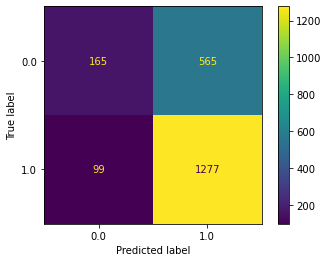

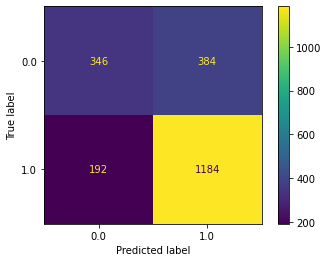

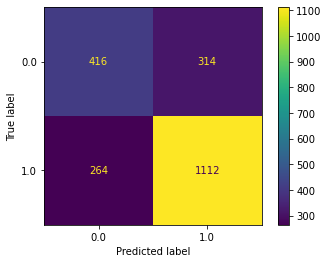

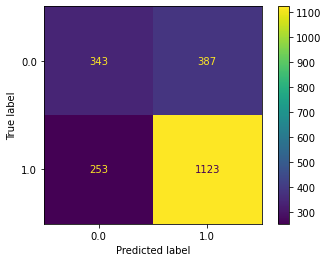

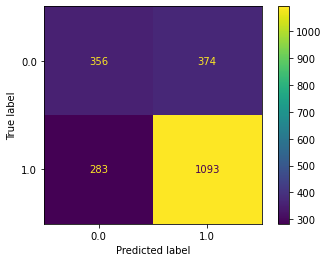

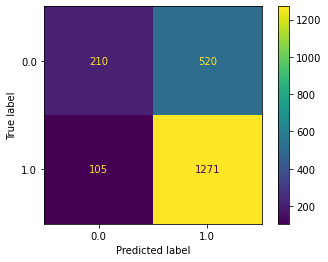

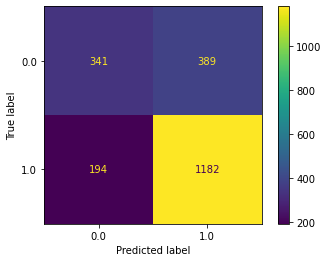

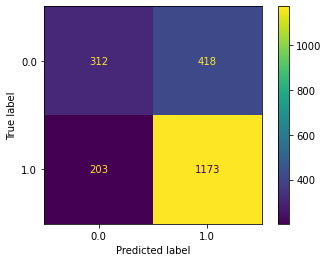

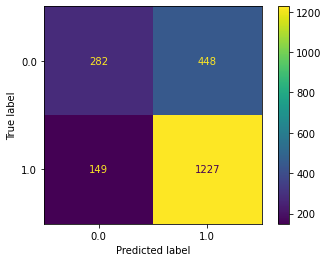

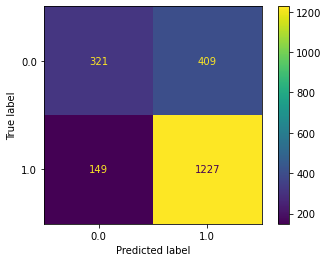

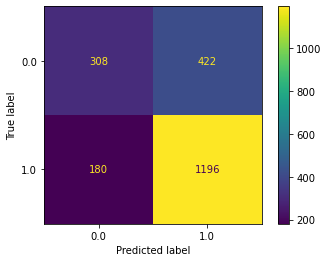

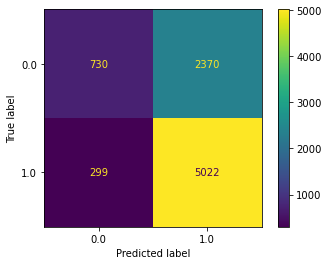

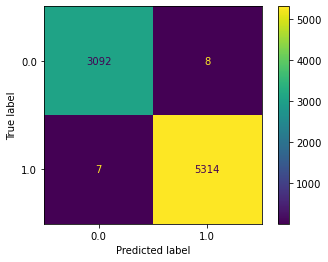

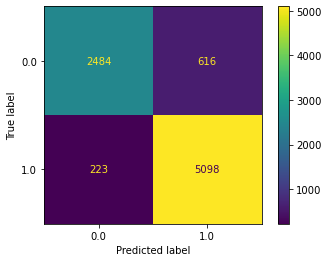

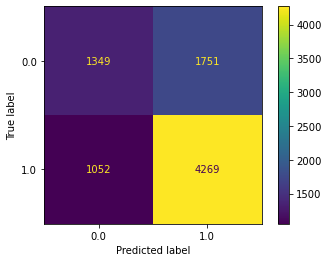

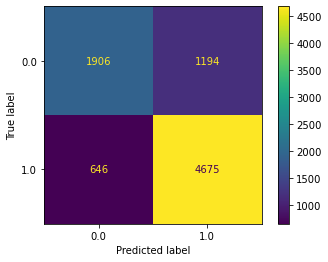

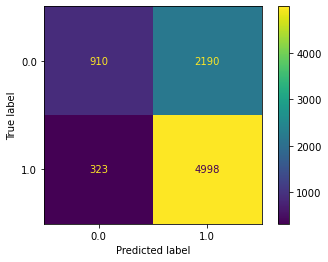

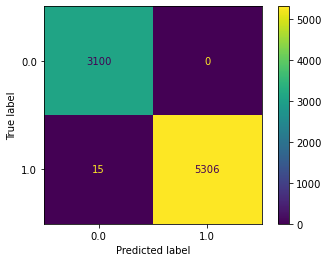

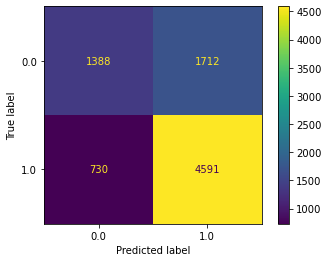

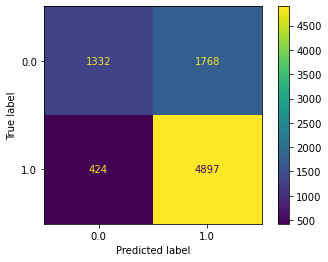

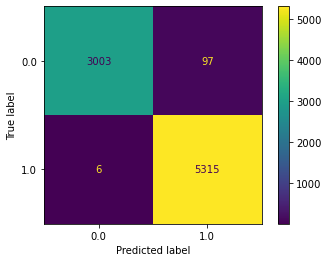

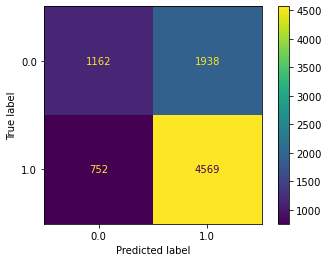

In [34]:

p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p4=plot_confusion_matrix(gnb, X_test, y_test)
p5=plot_confusion_matrix(KNN, X_test, y_test)
p6=plot_confusion_matrix(BC, X_test, y_test)
p7=plot_confusion_matrix(EC, X_test, y_test)
p8=plot_confusion_matrix(ADC, X_test, y_test)
p9=plot_confusion_matrix(GBC, X_test, y_test)
p10=plot_confusion_matrix(BCR, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)


p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p16=plot_confusion_matrix(gnb, X_train, y_train)
p17=plot_confusion_matrix(KNN, X_train, y_train)
p18=plot_confusion_matrix(BC, X_train, y_train)
p19=plot_confusion_matrix(EC, X_train, y_train)
p20=plot_confusion_matrix(ADC, X_train, y_train)
p21=plot_confusion_matrix(GBC, X_train, y_train)
p22=plot_confusion_matrix(BCR, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)


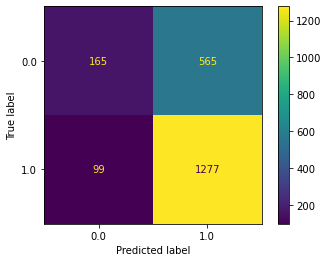

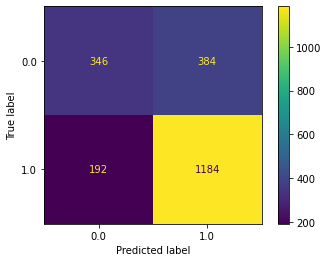

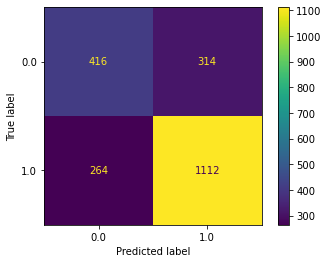

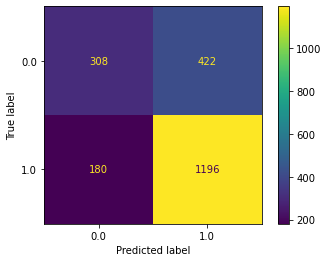

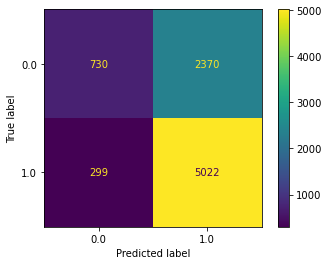

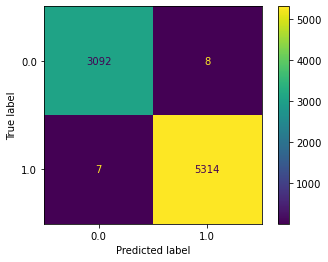

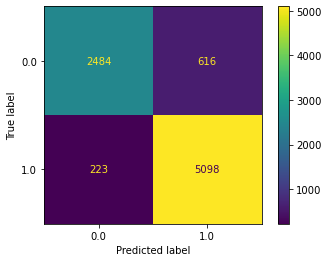

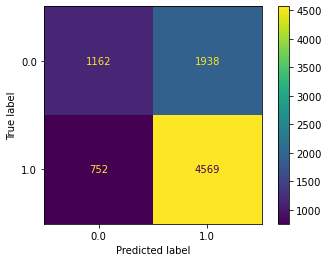

In [35]:
p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)

# Plotting Decision Tree

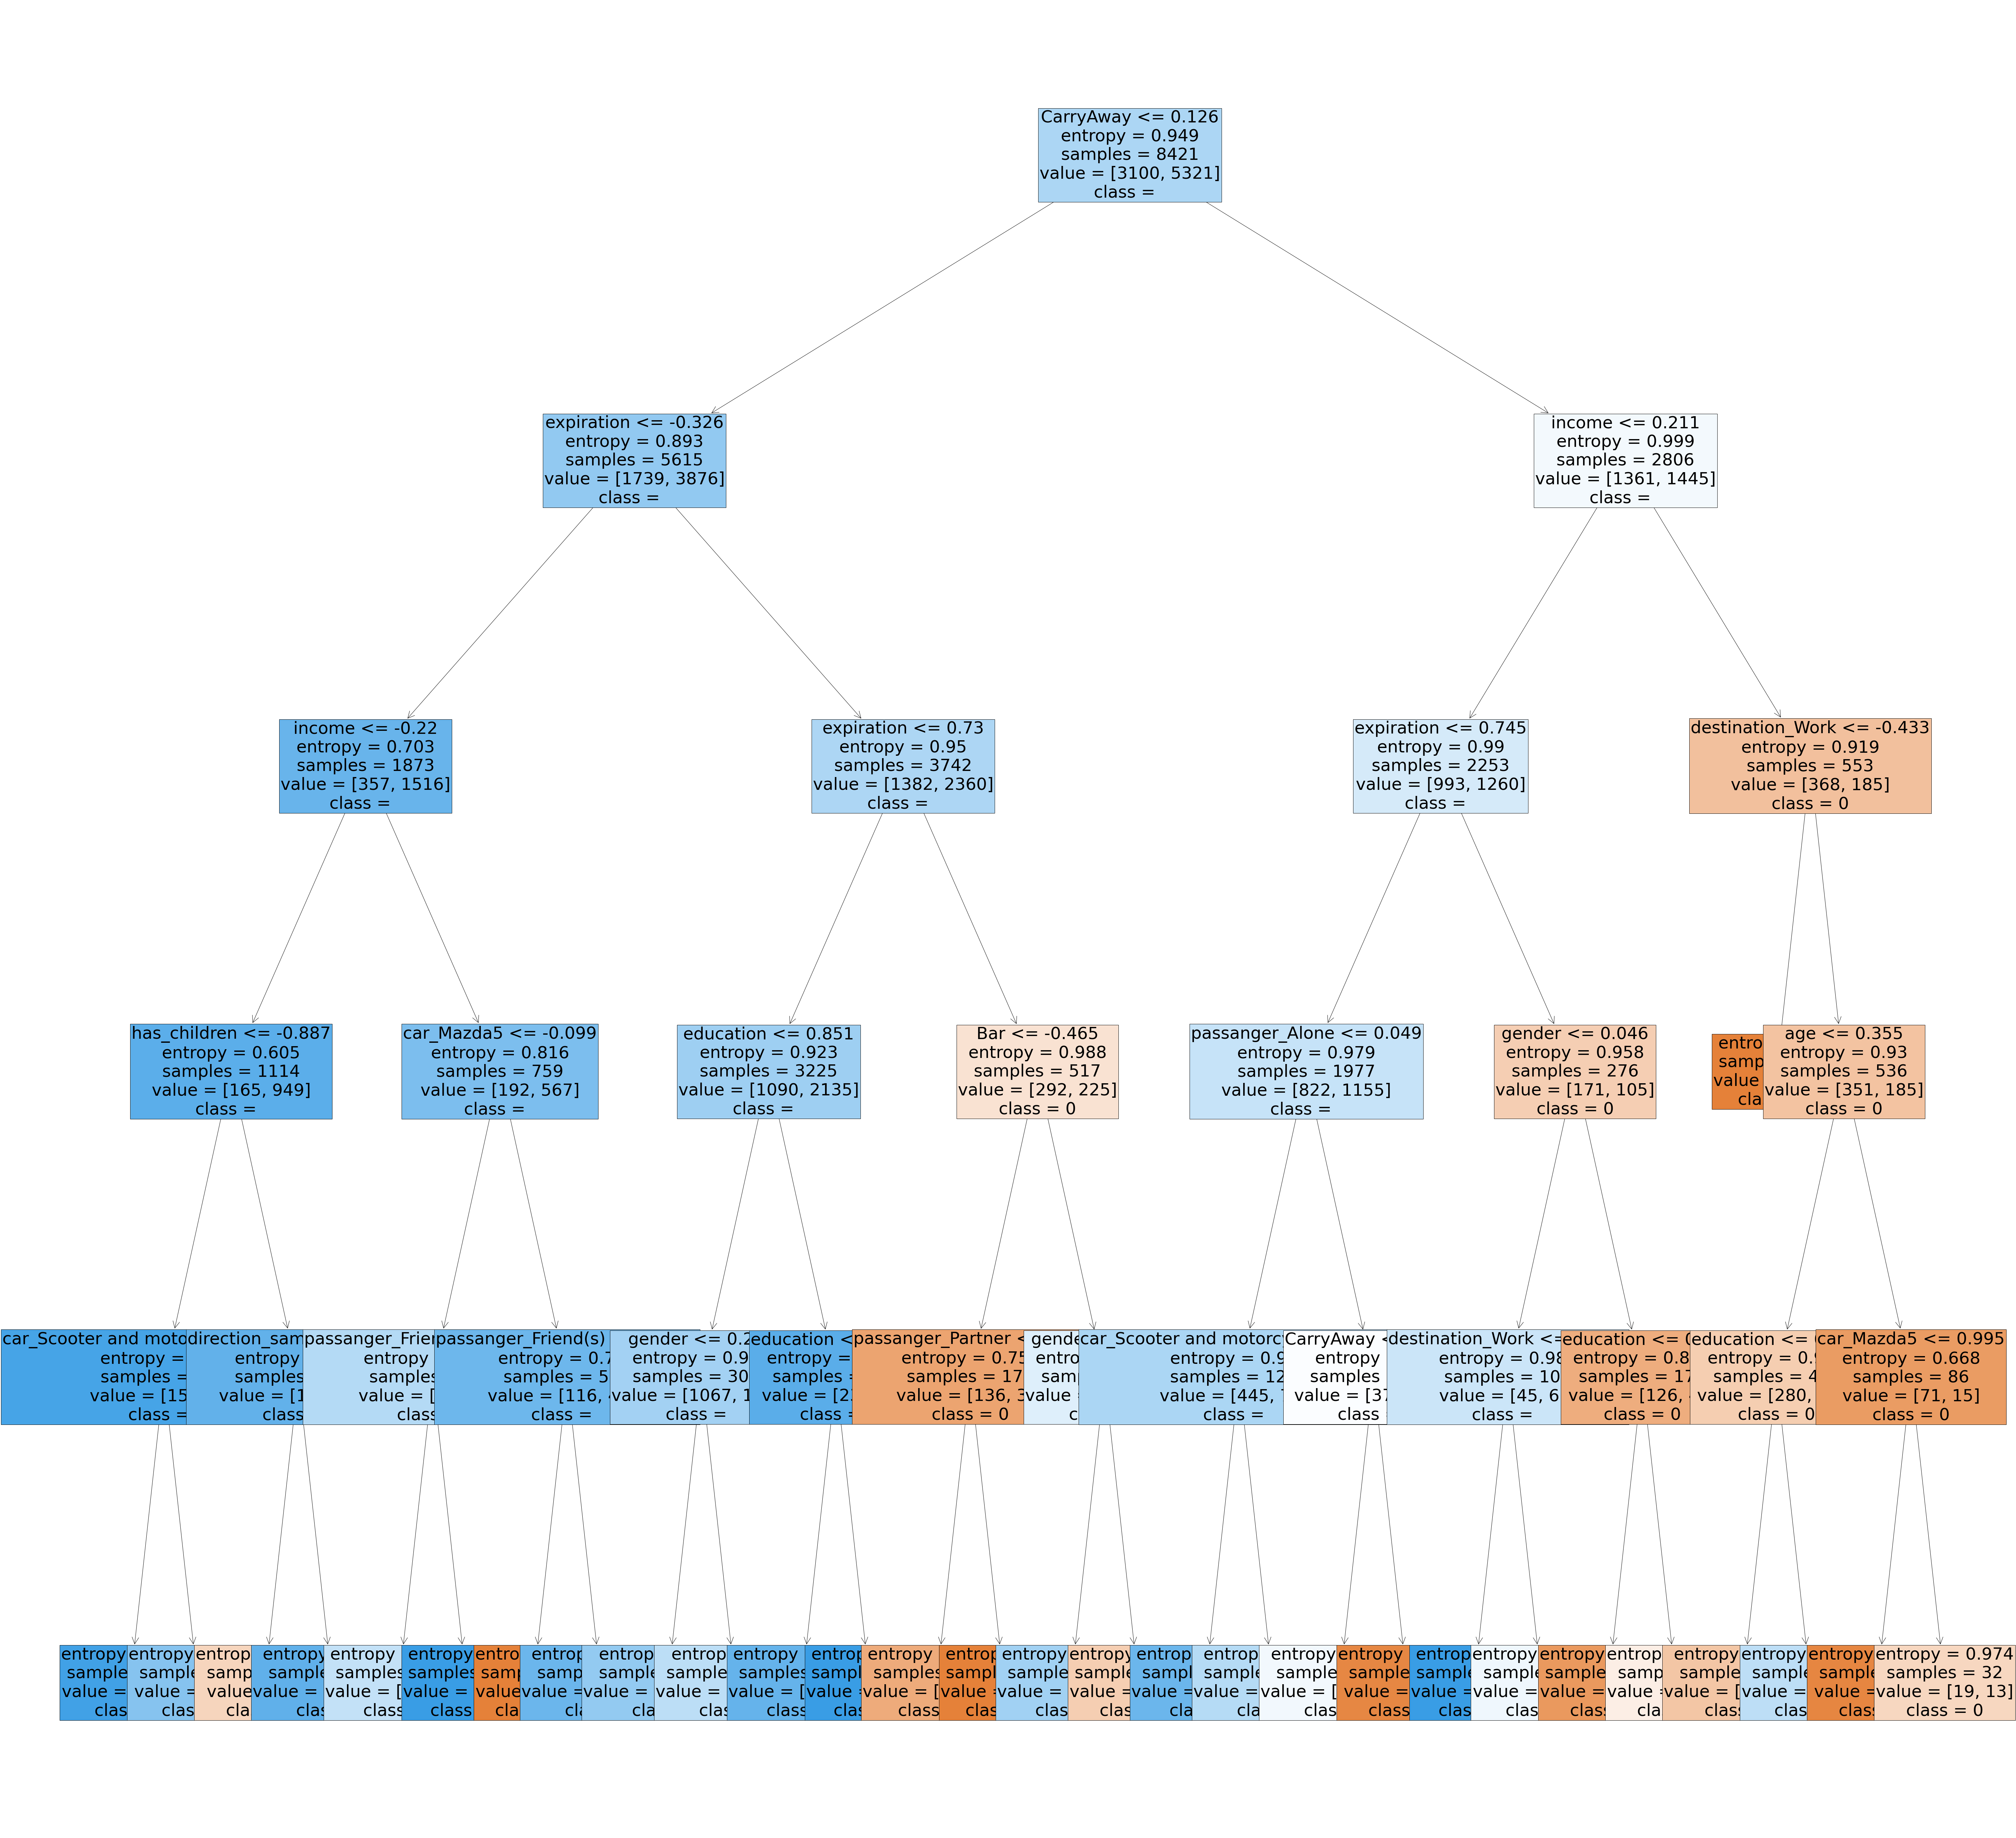

In [36]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(100,100))
fn=np.array(X1.columns)

cn=str(y1)
treee = tree.plot_tree(dt, fontsize=50,feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('dt_individualtree_PCA_Clubbed_WN.png')

# Validating the Training set Accuracy


In [37]:

dt_pred1 = dt.predict(X_train)
rf_pred1 = rf.predict(X_train)
sv_pred1 = sv.predict(X_train)
gnb_pred1 = gnb.predict(X_train)
KNN_pred1= KNN.predict(X_train)
BC_pred1 = BC.predict(X_train)
EC_pred1 = EC.predict(X_train)
ADC_pred1 = ADC.predict(X_train)
GBC_pred1 = GBC.predict(X_train)
LR_pred1 = LR.predict(X_train)
BCR_pred1 = BCR.predict(X_train)


dt_acc1 = accuracy_score(y_train, dt_pred1)
rf_acc1 = accuracy_score(y_train, rf_pred1)
sv_acc1 = accuracy_score(y_train, sv_pred1)
gnb_acc1 = accuracy_score(y_train, gnb_pred1)
KNN_acc1 = accuracy_score(y_train, KNN_pred1)
BC_acc1 = accuracy_score(y_train, BC_pred1)
EC_acc1 = accuracy_score(y_train, EC_pred1)
ADC_acc1 = accuracy_score(y_train, ADC_pred1)
GBC_acc1 = accuracy_score(y_train, GBC_pred1)
LR_acc1 = accuracy_score(y_train, LR_pred1)
BCR_acc1 = accuracy_score(y_train, BCR_pred1)


dt_auc1 = roc_auc_score(y_train, dt_pred1)
rf_auc1 = roc_auc_score(y_train, rf_pred1)
sv_auc1 = roc_auc_score(y_train, sv_pred1)
gnb_auc1 = roc_auc_score(y_train, gnb_pred1)
KNN_auc1 = roc_auc_score(y_train, KNN_pred1)
BC_auc1 = roc_auc_score(y_train, BC_pred1)
EC_auc1 = roc_auc_score(y_train, EC_pred1)
ADC_auc1 = roc_auc_score(y_train, ADC_pred1)
GBC_auc1 = roc_auc_score(y_train, GBC_pred1)
LR_auc1 = roc_auc_score(y_train, LR_pred1)
BCR_auc1 = roc_auc_score(y_train, BCR_pred1)


print('Decision tree acc: %.6f' % dt_acc1)
print('Random forest acc: %.6f' % rf_acc1)
print('SVM acc: %.6f' % sv_acc1)
print('Nabive Baise acc: %.6f' % gnb_acc1)
print('KNN: %.6f' % KNN_acc1)
print('BAGGING: %.6f' % BC_acc1)
print('Extra tree: %.6f' % EC_acc1)
print('ADC Boosting: %.6f' % ADC_acc1)
print('GDC Boosting: %.6f' % GBC_acc1)
print('Logistic: %.6f' % LR_acc1)
print('BAGGING Random Forest: %.6f' % BCR_acc1)

print()
print('Decision tree AUC: %.6f' % dt_auc1)
print('Random forest AUC: %.6f' % rf_auc1)
print('SVM AUC: %.6f' % sv_auc1)
print('gnb AUC: %.6f' % gnb_auc1)
print('KNN AUC: %.6f' % KNN_auc1)
print('Bagging AUC: %.6f' % BC_auc1)
print('Extra tree AUC: %.6f' % EC_auc1)
print('ADC Boosting: %.6f' % ADC_auc1)
print('GDC Boosting: %.6f' % GBC_auc1)
print('Logistic: %.6f' % LR_auc1)
print('BAGGING Random Forest: %.6f' % BCR_auc1)


Decision tree acc: 0.683054
Random forest acc: 0.998219
SVM acc: 0.900368
Nabive Baise acc: 0.667142
KNN: 0.781499
BAGGING: 0.701579
Extra tree: 0.998219
ADC Boosting: 0.710011
GDC Boosting: 0.739698
Logistic: 0.680561
BAGGING Random Forest: 0.987769

Decision tree AUC: 0.589646
Random forest AUC: 0.998052
SVM AUC: 0.879690
gnb AUC: 0.618727
KNN AUC: 0.746716
Bagging AUC: 0.616423
Extra tree AUC: 0.998590
ADC Boosting: 0.655275
GDC Boosting: 0.674997
Logistic: 0.616756
BAGGING Random Forest: 0.983791


In [38]:
print(dt)
print(rf)
print(sv)
print(gnb)
print(BC)
print(EC)
print(ADC)
print(GBC)
print(KNN)
print(LR)
print(BCR)


DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x2011BE3EB40)
RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x2011BE3EB40)
SVC(C=15.0)
GaussianNB()
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x2011BE3EB40),
                  n_estimators=100, random_state=7)
ExtraTreesClassifier(max_features=3)
AdaBoostClassifier(n_estimators=100, random_state=7)
GradientBoostingClassifier(random_state=7)
KNeighborsClassifier()
LogisticRegression(multi_class='multinomial', solver='newton-cg')
BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x2011BE3EB40),
         

# Voting

In [39]:
from sklearn.ensemble import VotingClassifier

In [40]:
Estimators = []
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
Estimators.append(('Decision_Tree', dt))

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
Estimators.append(('Random_Forest', rf))

sv = SVC(kernel='rbf', C=15.0)
Estimators.append(('SVM', sv))


LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')
Estimators.append(('Logistic', LR))




In [41]:
# create the ensemble model
ensemble = VotingClassifier(Estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.6798764348827719


# Explorative data analysis


In [42]:
from matplotlib import pyplot

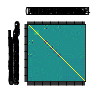

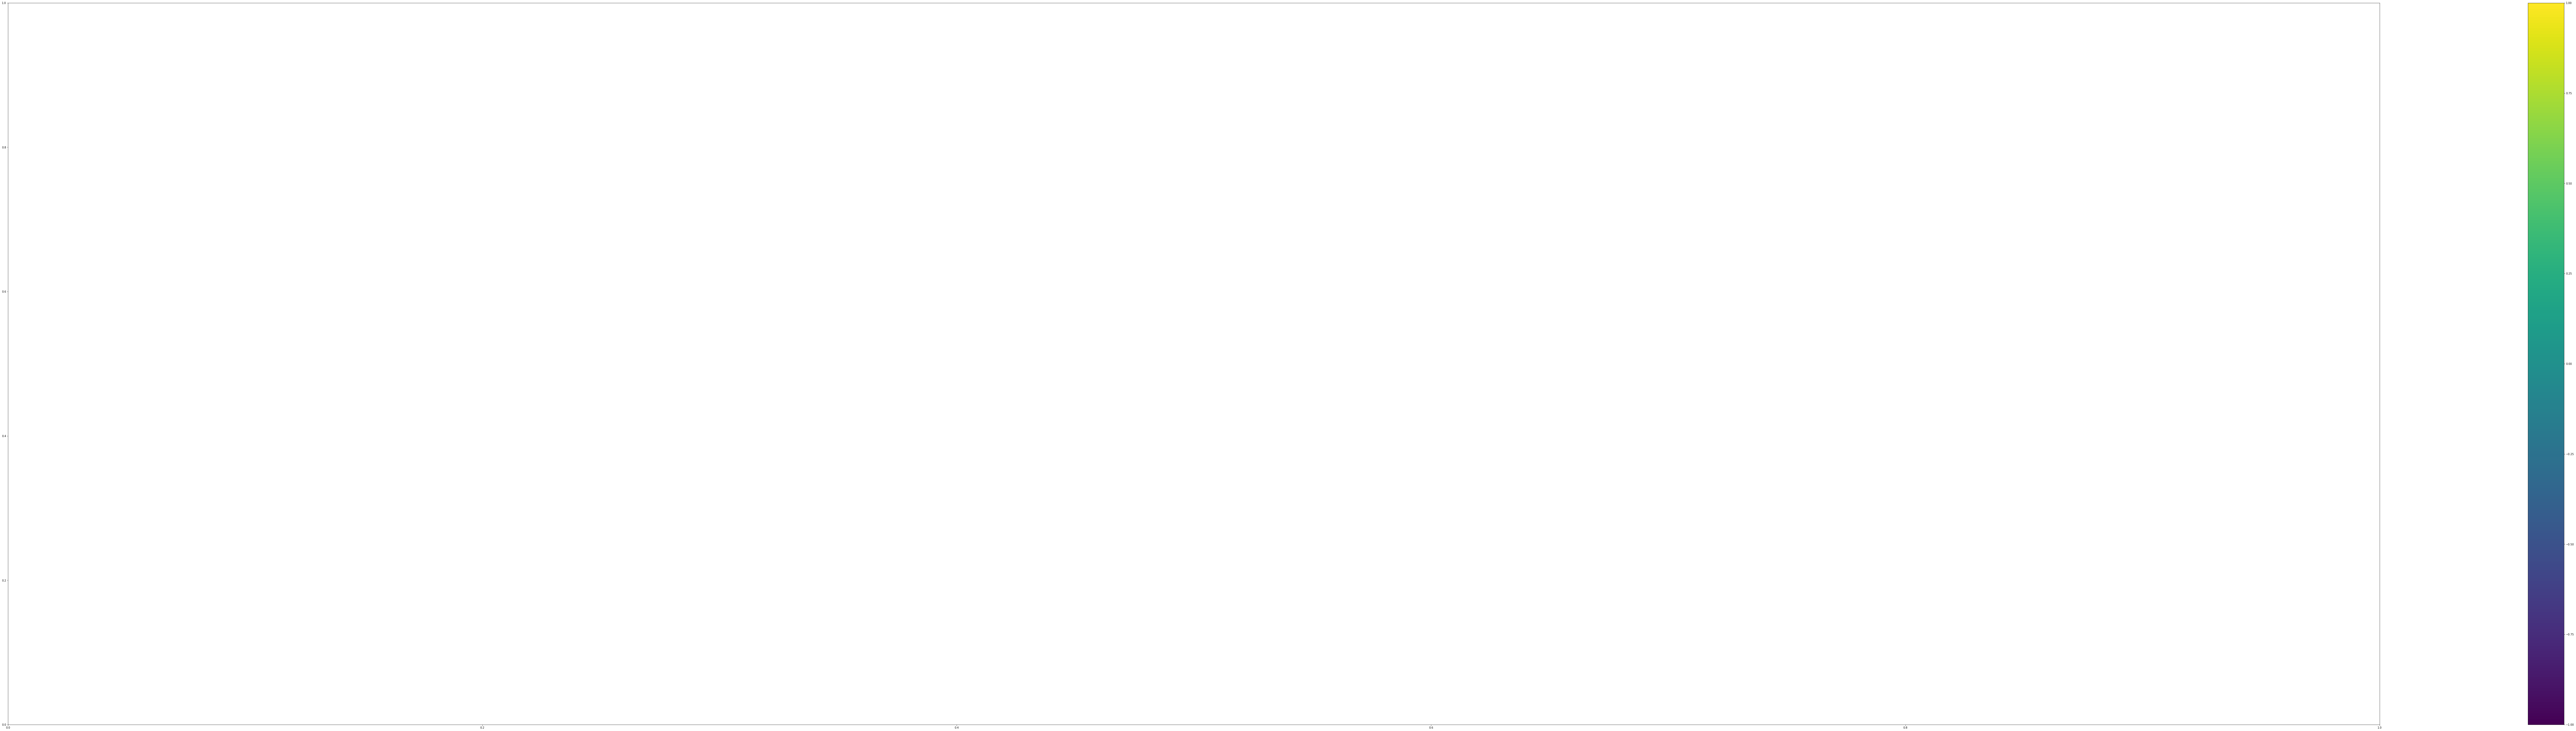

In [43]:
correlations = df.corr(method='pearson')
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(353)
fig = pyplot.figure(figsize =(200,50))
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names=df.head()
ticks = np.arange(0,65,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [44]:
from pandas.plotting import scatter_matrix

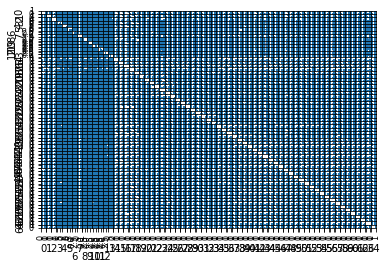

In [45]:
scatter_matrix(df)

pyplot.show()

In [46]:
peek = df.head(20)
print(peek)

     0    1    2    3    4    5    6    7    8    9   ...   55   56   57   58  \
0   1.0  1.0  0.0  6.0  4.0  6.0  1.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
1   1.0  1.0  1.0  6.0  4.0  6.0  3.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
2   1.0  1.0  0.0  6.0  4.0  6.0  0.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
3   1.0  0.0  0.0  1.0  3.0  1.0  1.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
4   1.0  0.0  1.0  1.0  3.0  1.0  3.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
5   1.0  0.0  0.0  1.0  3.0  1.0  0.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
6   1.0  0.0  0.0  4.0  4.0  2.0  1.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
7   1.0  0.0  1.0  4.0  4.0  2.0  3.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
8   1.0  0.0  0.0  4.0  4.0  2.0  0.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
9   1.0  0.0  0.0  3.0  2.0  2.0  1.0  1.0  4.0  4.0  ...  0.0  0.0  0.0  0.0   
10  1.0  0.0  1.0  3.0  2.0  2.0  3.0  1.0  4.0  4.0  ...  0.0  0.0  0.0  0.0   
11  1.0  0.0  0.0  3.0  2.0 

In [47]:
shape = df.shape
print(shape)

(10527, 65)


In [48]:
type = df.dtypes
print(type)

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
60    float64
61    float64
62    float64
63    float64
64    float64
Length: 65, dtype: object


In [49]:
from pandas import set_option

In [50]:
set_option('display.width', 200)
set_option('display.max_columns', 10)
set_option('precision', 3)

description = df1.describe()
print(description)

          gender  has_children  direction_same     income  education  ...  occupation_Sales & Related  occupation_Student  occupation_Transportation & Material Moving  occupation_Unemployed  \
count  10527.000     10527.000       10527.000  10527.000  10527.000  ...                   10527.000           10527.000                                    10527.000              10527.000   
mean       0.486         0.408           0.218      3.791      3.162  ...                       0.081               0.125                                        0.019                  0.143   
std        0.500         0.491           0.413      2.570      1.264  ...                       0.273               0.331                                        0.137                  0.350   
min        0.000         0.000           0.000      0.000      0.000  ...                       0.000               0.000                                        0.000                  0.000   
25%        0.000         0.000     

In [51]:
class_counts = df1.groupby('Y').size()
print(class_counts)


Y
0    3830
1    6697
dtype: int64


In [52]:
correlations = df.corr(method='pearson')
print(correlations)

       0      1      2      3      4   ...     60     61     62     63     64
0   1.000 -0.157 -0.001  0.093 -0.019  ...  0.034  0.103  0.069 -0.117  0.050
1  -0.157  1.000 -0.033  0.095  0.077  ... -0.040 -0.222  0.046 -0.020 -0.031
2  -0.001 -0.033  1.000 -0.029 -0.008  ...  0.005  0.028 -0.004  0.022  0.009
3   0.093  0.095 -0.029  1.000  0.289  ... -0.068 -0.132 -0.010 -0.074 -0.042
4  -0.019  0.077 -0.008  0.289  1.000  ... -0.024 -0.145 -0.068 -0.098 -0.075
..    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
60  0.034 -0.040  0.005 -0.068 -0.024  ...  1.000 -0.113 -0.041 -0.121  0.015
61  0.103 -0.222  0.028 -0.132 -0.145  ... -0.113  1.000 -0.053 -0.155  0.020
62  0.069  0.046 -0.004 -0.010 -0.068  ... -0.041 -0.053  1.000 -0.057  0.003
63 -0.117 -0.020  0.022 -0.074 -0.098  ... -0.121 -0.155 -0.057  1.000  0.005
64  0.050 -0.031  0.009 -0.042 -0.075  ...  0.015  0.020  0.003  0.005  1.000

[65 rows x 65 columns]


In [53]:
skew = df.skew()
print(skew)

0     0.055
1     0.374
2     1.366
3     0.325
4    -0.125
      ...  
60    3.066
61    2.264
62    7.048
63    2.040
64   -0.566
Length: 65, dtype: float64


In [54]:
skew.to_csv('Skew2_Clubbed_WN.csv', index=False)

In [55]:
correlations.to_csv('correlations_PCA_Clubbed_WN.csv', index=False)

In [56]:
description.to_csv('description_PCA_Clubbed_WN.csv', index=False)

# Random Forest Tree

In [57]:
from sklearn.tree import export_graphviz

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

<Figure size 14400x11520 with 0 Axes>

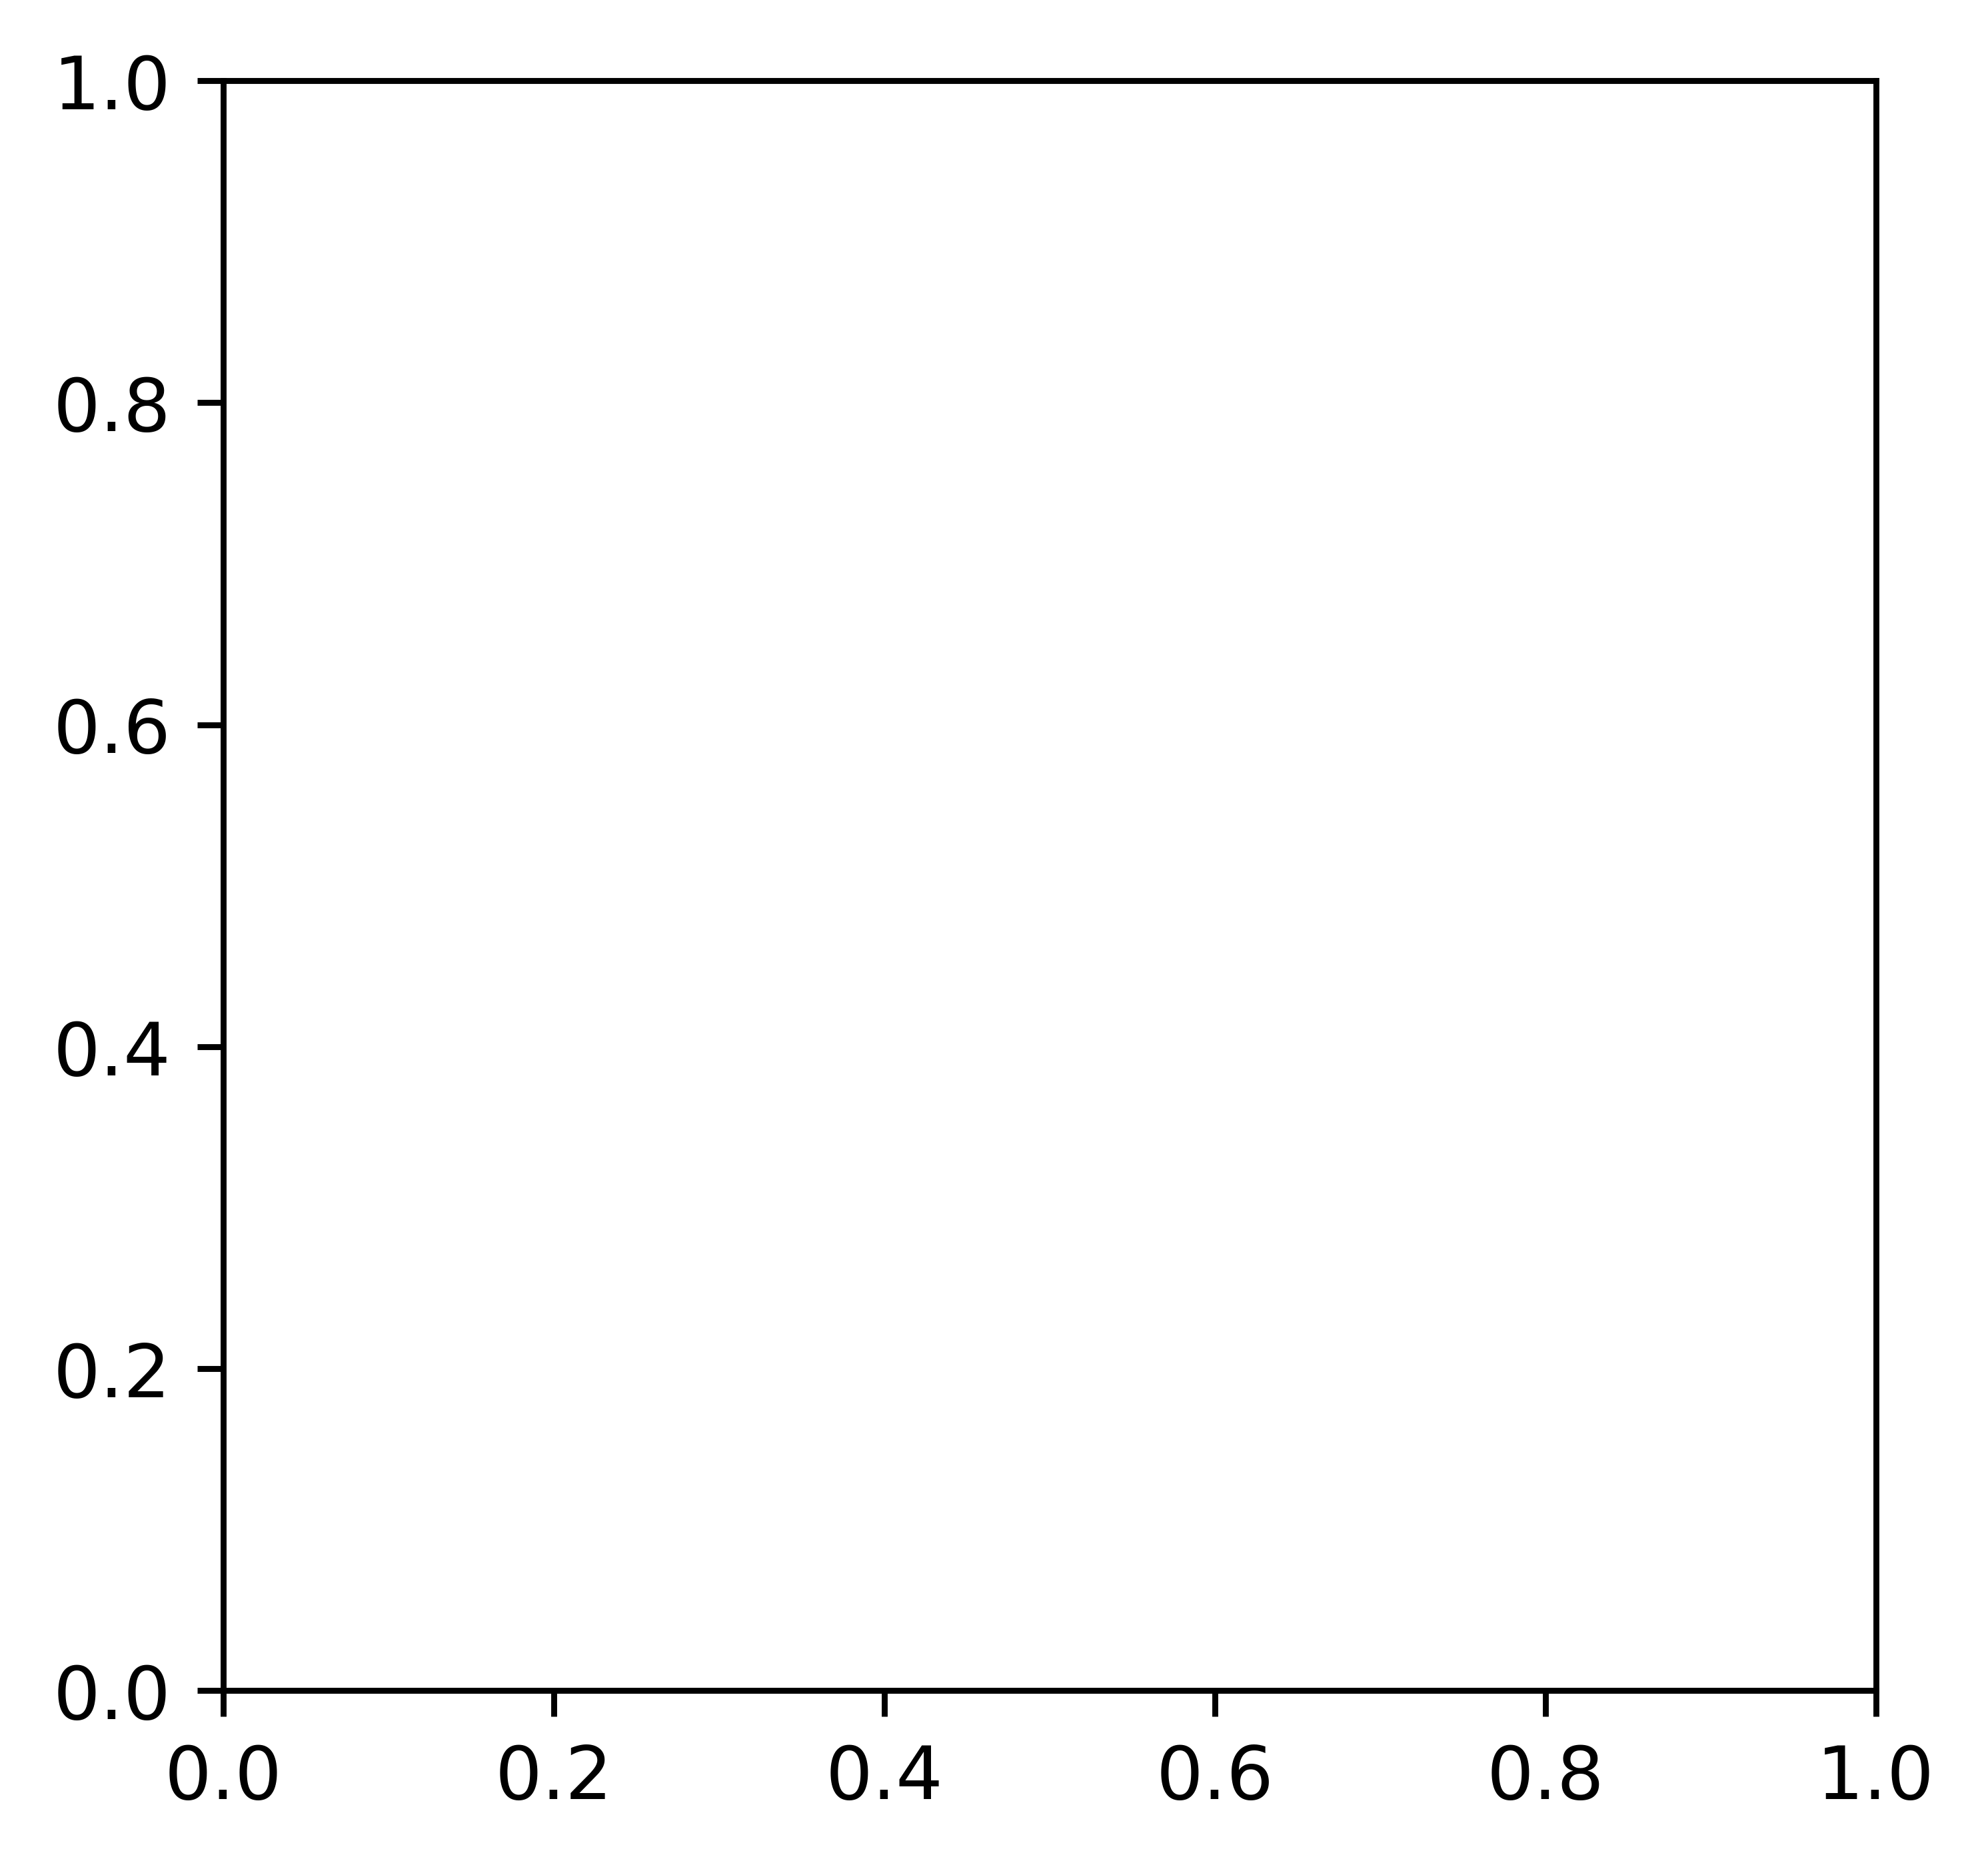

In [58]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(200,160))
fn=np.array(X1.columns)
cn=str(y1)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree_PCA_Clubbed_WN.png')